In [1]:
!pip install -U scikit-learn

In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy import stats

In [3]:
singapore_resale_df = pd.concat([pd.read_csv(f) for f in glob.glob("./Data/*.csv")], ignore_index=True)
singapore_resale_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
singapore_resale_df.shape

(922043, 11)

/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


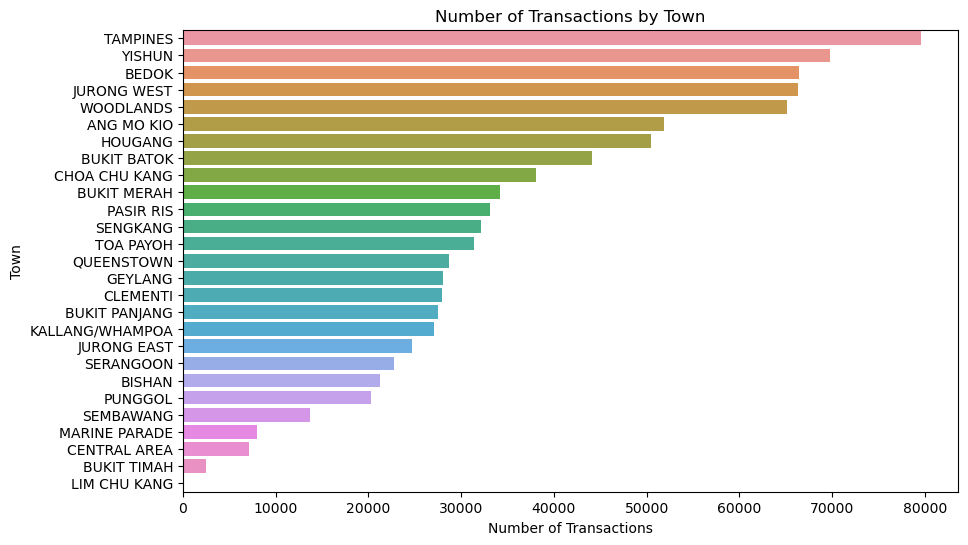

In [5]:
# Bar plot of 'town'
plt.figure(figsize=(10, 6))
sns.countplot(data=singapore_resale_df, y='town', order=singapore_resale_df['town'].value_counts().index)
plt.title('Number of Transactions by Town')
plt.xlabel('Number of Transactions')
plt.ylabel('Town')
plt.show()

In [6]:
singapore_resale_df_copy = singapore_resale_df

In [7]:
singapore_resale_df_copy.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [8]:
singapore_resale_df_copy.isnull().sum() 

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709050
resale_price                0
dtype: int64

In [9]:
singapore_resale_df_copy.dropna(subset = ["remaining_lease"], inplace=True)

In [10]:
singapore_resale_df_copy

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
212988,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
212989,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
212990,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
212991,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [11]:
def rem_lease(lease):
    if isinstance(lease, int):
        # If it's an integer, return it directly
        return lease
    if isinstance(lease, float):
        # If it's an integer, return it directly
        return int(lease)
    #92 years 04 months
    components = lease.split(' ')
    if("years" in components and "months" in components):
        years_index = components.index("years")
        months_index = components.index("months")
        
        # Extract numeric values for years and months
        years = int(components[years_index - 1])
        months = int(components[months_index - 1])
        
        # Convert years and months to total months
        total_months = years * 12 + months
    elif("years" in components):
        # Extract numeric value for years
        years_index = components.index("years")
        years = int(components[years_index - 1])
        
        # Convert years to total months
        total_months = years * 12
    elif("months" in components):
        months_index = components.index("months")
        months = int(components[months_index - 1])
        
        # Total months is just the numeric value for months
        total_months = months
    else:
        total_months = 0

    return total_months

In [12]:
singapore_resale_df_copy["remaining_lease"] = singapore_resale_df_copy["remaining_lease"].map(lambda x: rem_lease(x))

In [13]:
singapore_resale_df_copy.rename(columns={'remaining_lease': 'Remaining lease (months)'}, inplace=True)

In [14]:
singapore_resale_df_copy.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Remaining lease (months),resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,736,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,727,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,744,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,756,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,738,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,700,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,738,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,736,285000.0


In [15]:
singapore_resale_df_copy.isnull().sum() 

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
Remaining lease (months)    0
resale_price                0
dtype: int64

In [16]:
singapore_resale_df_copy.duplicated().sum()

308

In [17]:
duplicates = singapore_resale_df_copy[singapore_resale_df_copy.duplicated()]

In [18]:
duplicates

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Remaining lease (months),resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,684,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,734,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,969,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,1107,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,946,368000.0
...,...,...,...,...,...,...,...,...,...,...,...
205844,2016-08,KALLANG/WHAMPOA,5 ROOM,103,JLN RAJAH,07 TO 09,135.0,Model A,1984,66,700000.0
206391,2016-08,TAMPINES,4 ROOM,168B,SIMEI LANE,10 TO 12,94.0,DBSS,2011,93,618000.0
207883,2016-09,SENGKANG,4 ROOM,271A,SENGKANG CTRL,10 TO 12,93.0,Premium Apartment,2010,92,480000.0
211942,2016-12,BUKIT PANJANG,4 ROOM,447,BT PANJANG RING RD,07 TO 09,101.0,Model A,1997,79,330000.0


In [19]:
singapore_resale_df_copy.drop_duplicates(keep='last', inplace=True)

In [20]:
singapore_resale_df_copy.duplicated().sum()

0

In [21]:
singapore_resale_df_copy.nunique()

month                        111
town                          26
flat_type                      7
block                       2705
street_name                  567
storey_range                  17
floor_area_sqm               173
flat_model                    21
lease_commence_date           56
Remaining lease (months)     665
resale_price                4079
dtype: int64

In [22]:
singapore_resale_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,212685.0,97.185954,24.059211,31.0,82.0,94.0,112.0,280.0
lease_commence_date,212685.0,1995.074688,13.637533,1966.0,1985.0,1995.0,2004.0,2022.0
Remaining lease (months),212685.0,752.192223,346.862861,48.0,672.0,820.0,995.0,1173.0
resale_price,212685.0,484694.753738,167190.829845,100000.0,361000.0,450000.0,575000.0,1568888.0


In [23]:
singapore_resale_df_copy['flat_type'].value_counts()

flat_type
4 ROOM              89154
5 ROOM              52503
3 ROOM              51503
EXECUTIVE           15957
2 ROOM               3408
MULTI-GENERATION       82
1 ROOM                 78
Name: count, dtype: int64

In [24]:
singapore_resale_df_copy['town'].value_counts()

town
SENGKANG           17216
WOODLANDS          15031
PUNGGOL            14592
JURONG WEST        14485
TAMPINES           14373
YISHUN             14202
BEDOK              11768
HOUGANG            10737
CHOA CHU KANG       9776
ANG MO KIO          9102
BUKIT MERAH         8108
BUKIT BATOK         8083
BUKIT PANJANG       7884
TOA PAYOH           6614
PASIR RIS           6434
KALLANG/WHAMPOA     6399
QUEENSTOWN          5835
SEMBAWANG           5784
GEYLANG             5342
CLEMENTI            4893
JURONG EAST         4423
SERANGOON           4041
BISHAN              3889
CENTRAL AREA        1834
MARINE PARADE       1307
BUKIT TIMAH          533
Name: count, dtype: int64

In [25]:
singapore_resale_df_copy['storey_range'].value_counts()

storey_range
04 TO 06    49358
07 TO 09    45049
10 TO 12    39855
01 TO 03    37966
13 TO 15    19976
16 TO 18     9191
19 TO 21     3893
22 TO 24     2799
25 TO 27     1649
28 TO 30     1071
31 TO 33      562
34 TO 36      514
37 TO 39      451
40 TO 42      221
43 TO 45       64
46 TO 48       49
49 TO 51       17
Name: count, dtype: int64

In [26]:
singapore_resale_df_copy['flat_model'].value_counts()

flat_model
Model A                   72024
Improved                  52783
New Generation            28171
Premium Apartment         23410
Simplified                 8622
Apartment                  7989
Maisonette                 6050
Standard                   6002
DBSS                       3177
Model A2                   2597
Type S1                     432
Model A-Maisonette          385
Adjoined flat               360
Type S2                     215
Terrace                     119
Premium Apartment Loft      107
2-room                       87
Multi Generation             82
Improved-Maisonette          29
3Gen                         28
Premium Maisonette           16
Name: count, dtype: int64

In [27]:
singapore_resale_df_copy.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'Remaining lease (months)', 'resale_price'],
      dtype='object')

In [28]:
# Convert the 'month' column to a datetime format
singapore_resale_df_copy['month'] = pd.to_datetime(singapore_resale_df_copy['month'])

# Extract the year and month into separate columns
singapore_resale_df_copy['year'] = singapore_resale_df_copy['month'].dt.year
singapore_resale_df_copy['month_of_year'] = singapore_resale_df_copy['month'].dt.month
singapore_resale_df_copy

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Remaining lease (months),resale_price,year,month_of_year
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,736,232000.0,2017,1
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,727,250000.0,2017,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,262000.0,2017,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,744,265000.0,2017,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,265000.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212988,2016-12-01,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0,2016,12
212989,2016-12-01,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0,2016,12
212990,2016-12-01,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0,2016,12
212991,2016-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0,2016,12


In [29]:
singapore_resale_df_copy.dtypes 

month                       datetime64[ns]
town                                object
flat_type                           object
block                               object
street_name                         object
storey_range                        object
floor_area_sqm                     float64
flat_model                          object
lease_commence_date                  int64
Remaining lease (months)             int64
resale_price                       float64
year                                 int32
month_of_year                        int32
dtype: object

In [30]:
singapore_resale_df_copy.drop(columns=['month','lease_commence_date'],inplace = True)

In [31]:
singapore_resale_df_copy

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,Remaining lease (months),resale_price,year,month_of_year
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,736,232000.0,2017,1
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,727,250000.0,2017,1
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,749,262000.0,2017,1
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,744,265000.0,2017,1
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,749,265000.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
212988,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,82,488000.0,2016,12
212989,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,69,455000.0,2016,12
212990,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,74,778000.0,2016,12
212991,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,70,575000.0,2016,12


In [32]:
singapore_resale_df_copy.describe()

,floor_area_sqm,Remaining lease (months),resale_price,year,month_of_year
count,212685.000000,212685.000000,2.126850e+05,212685.000000,212685.000000
mean,97.185954,752.192223,4.846948e+05,2019.500952,6.544721
std,24.059211,346.862861,1.671908e+05,2.626192,3.432253
min,31.000000,48.000000,1.000000e+05,2015.000000,1.000000
25%,82.000000,672.000000,3.610000e+05,2017.000000,3.000000
50%,94.000000,820.000000,4.500000e+05,2020.000000,7.000000
75%,112.000000,995.000000,5.750000e+05,2022.000000,9.000000
max,280.000000,1173.000000,1.568888e+06,2024.000000,12.000000


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()
singapore_resale_df_copy['town'] = encoder.fit_transform(singapore_resale_df_copy['town'])
singapore_resale_df_copy['flat_type'] = encoder.fit_transform(singapore_resale_df_copy['flat_type'])
singapore_resale_df_copy['storey_range'] = encoder.fit_transform(singapore_resale_df_copy['storey_range'])
singapore_resale_df_copy['flat_model'] = encoder.fit_transform(singapore_resale_df_copy['flat_model'])

In [35]:
singapore_resale_df_copy

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,Remaining lease (months),resale_price,year,month_of_year
0,0,1,406,ANG MO KIO AVE 10,3,44.0,5,736,232000.0,2017,1
1,0,2,108,ANG MO KIO AVE 4,0,67.0,12,727,250000.0,2017,1
2,0,2,602,ANG MO KIO AVE 5,0,67.0,12,749,262000.0,2017,1
3,0,2,465,ANG MO KIO AVE 10,1,68.0,12,744,265000.0,2017,1
4,0,2,601,ANG MO KIO AVE 5,0,67.0,12,749,265000.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
212988,25,4,297,YISHUN ST 20,4,112.0,5,82,488000.0,2016,12
212989,25,4,838,YISHUN ST 81,0,122.0,5,69,455000.0,2016,12
212990,25,5,664,YISHUN AVE 4,3,181.0,3,74,778000.0,2016,12
212991,25,5,325,YISHUN CTRL,0,146.0,7,70,575000.0,2016,12


In [36]:
singapore_resale_df_copy['floor_area_sqm'] = np.log(singapore_resale_df_copy['floor_area_sqm'])
singapore_resale_df_copy['resale_price'] = np.log(singapore_resale_df_copy['resale_price'])
singapore_resale_df_copy

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,Remaining lease (months),resale_price,year,month_of_year
0,0,1,406,ANG MO KIO AVE 10,3,3.784190,5,736,12.354493,2017,1
1,0,2,108,ANG MO KIO AVE 4,0,4.204693,12,727,12.429216,2017,1
2,0,2,602,ANG MO KIO AVE 5,0,4.204693,12,749,12.476100,2017,1
3,0,2,465,ANG MO KIO AVE 10,1,4.219508,12,744,12.487485,2017,1
4,0,2,601,ANG MO KIO AVE 5,0,4.204693,12,749,12.487485,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
212988,25,4,297,YISHUN ST 20,4,4.718499,5,82,13.098071,2016,12
212989,25,4,838,YISHUN ST 81,0,4.804021,5,69,13.028053,2016,12
212990,25,5,664,YISHUN AVE 4,3,5.198497,3,74,13.564482,2016,12
212991,25,5,325,YISHUN CTRL,0,4.983607,7,70,13.262125,2016,12


In [37]:
singapore_resale_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
town,212685.0,13.895028,7.955773,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,212685.0,3.122764,0.919194,0.000000,2.000000,3.000000,4.000000,6.000000
storey_range,212685.0,2.219827,1.948878,0.000000,1.000000,2.000000,3.000000,16.000000
floor_area_sqm,212685.0,4.544651,0.257355,3.433987,4.406719,4.543295,4.718499,5.634790
flat_model,212685.0,8.694299,3.650578,0.000000,5.000000,8.000000,12.000000,20.000000
Remaining lease (months),212685.0,752.192223,346.862861,48.000000,672.000000,820.000000,995.000000,1173.000000
resale_price,212685.0,13.035774,0.330842,11.512925,12.796633,13.017003,13.262125,14.265878
year,212685.0,2019.500952,2.626192,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month_of_year,212685.0,6.544721,3.432253,1.000000,3.000000,7.000000,9.000000,12.000000


/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


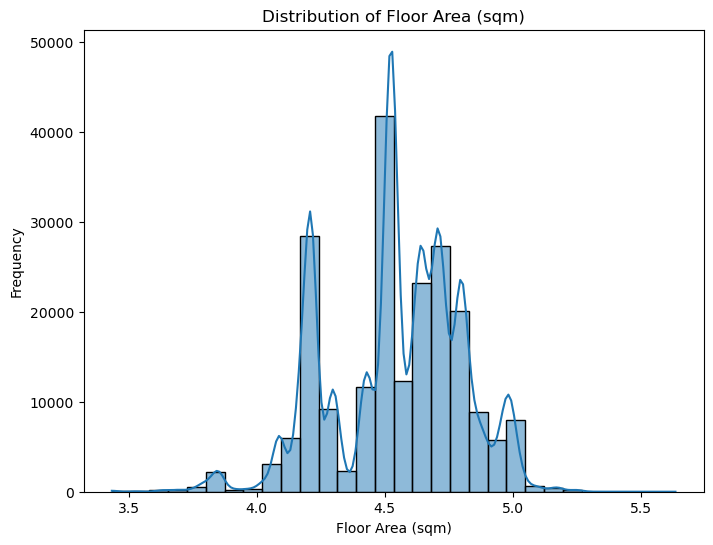

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data=singapore_resale_df, x='floor_area_sqm', bins=30, kde=True)
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


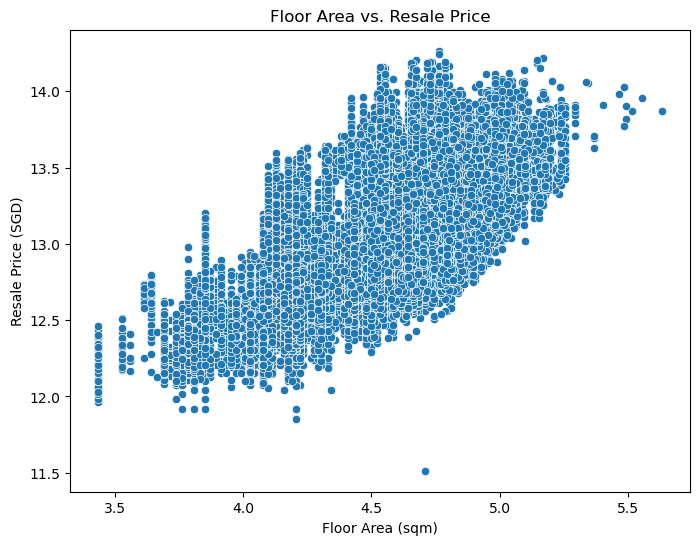

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=singapore_resale_df, x='floor_area_sqm', y='resale_price')
plt.title('Floor Area vs. Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')
plt.show()

/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

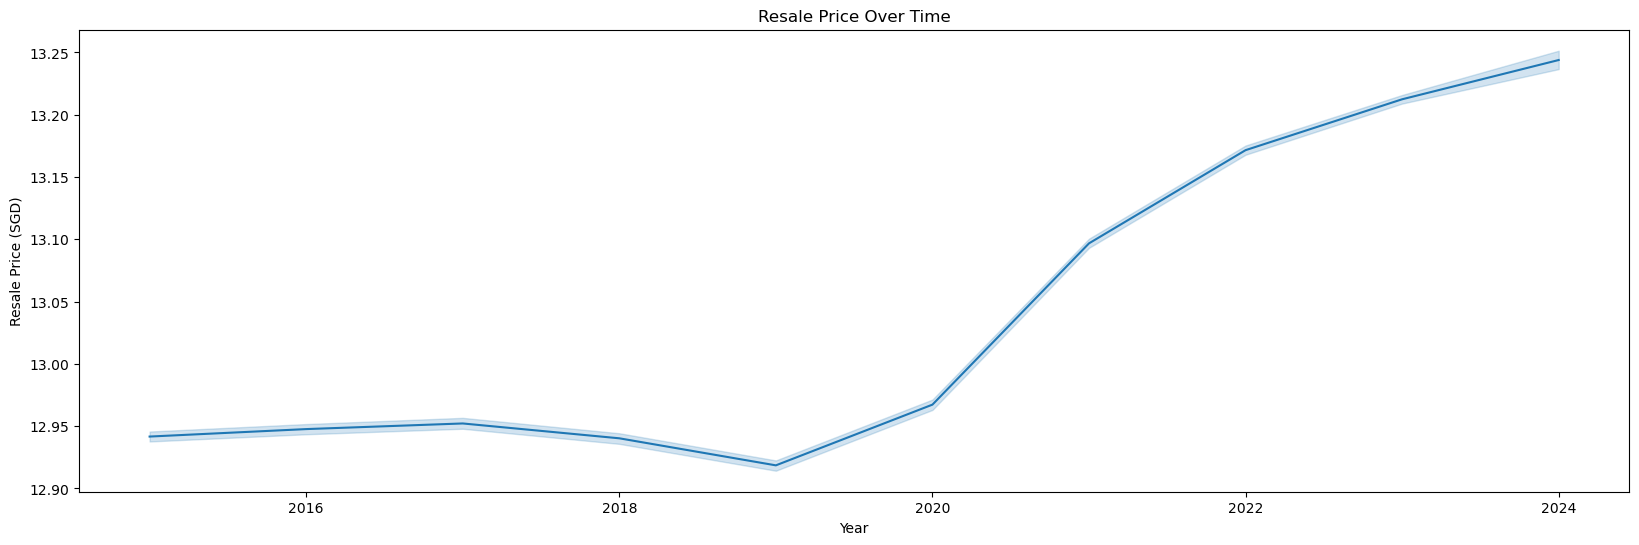

In [40]:
# Line plot of transactions over time
plt.figure(figsize=(20, 6))
sns.lineplot(data=singapore_resale_df, x='year', y='resale_price')
plt.title('Resale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')
plt.show()

/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='Remaining lease (months)', ylabel='resale_price'>

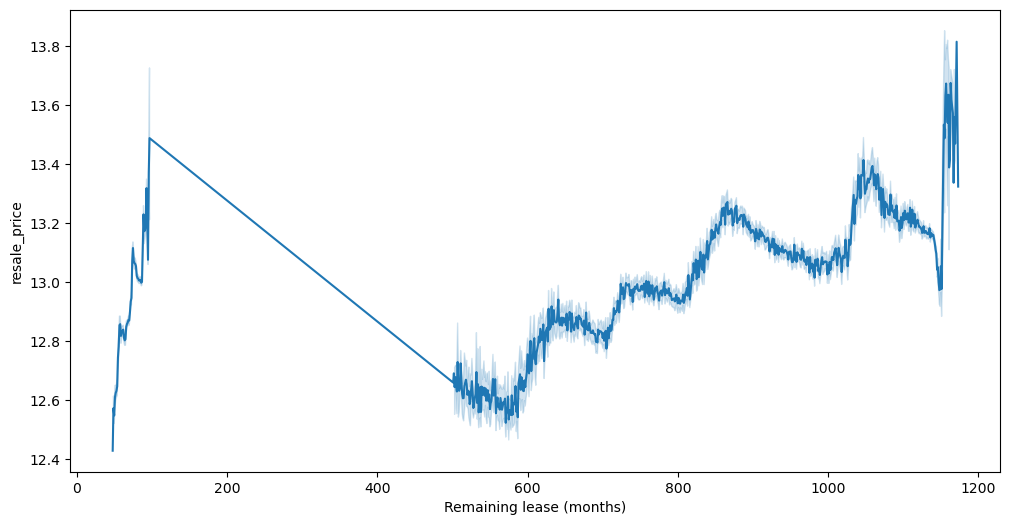

In [41]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Remaining lease (months)' , y = 'resale_price', data = singapore_resale_df)

In [42]:
singapore_resale_df_copy.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'Remaining lease (months)',
       'resale_price', 'year', 'month_of_year'],
      dtype='object')

In [43]:
singapore_resale_df_copy.rename(columns={'town': 'Town', 'flat_type': 'Flat Type', 'block': 'Block', 'street_name': 'Street Name', 'storey_range': 'Storey Range', 'floor_area_sqm': 'Floor Area (Sqm)', 'flat_model': 'Flat Model', 'year': 'Transaction Year', 'month_of_year': 'Transaction Month', 'resale_price': 'Resale Price'}, inplace=True)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [45]:
singapore_resale_df_copy.columns

Index(['Town', 'Flat Type', 'Block', 'Street Name', 'Storey Range',
       'Floor Area (Sqm)', 'Flat Model', 'Remaining lease (months)',
       'Resale Price', 'Transaction Year', 'Transaction Month'],
      dtype='object')

In [46]:
x = singapore_resale_df_copy[['Town', 'Flat Type', 'Storey Range', 'Floor Area (Sqm)', 
                              'Flat Model', 'Transaction Year', 'Transaction Month', 'Remaining lease (months)']]
y = singapore_resale_df_copy['Resale Price'].values

In [47]:
encoder = StandardScaler()

encoder.fit_transform(x)

array([[-1.74653819, -2.30937933,  0.40031985, ..., -0.95231343,
        -1.61547953, -0.04668203],
       [-1.74653819, -1.2214677 , -1.13903134, ..., -0.95231343,
        -1.61547953, -0.07262894],
       [-1.74653819, -1.2214677 , -1.13903134, ..., -0.95231343,
        -1.61547953, -0.00920315],
       ...,
       [ 1.3958416 ,  2.04226719,  0.40031985, ..., -1.33309379,
         1.58942016, -1.95522177],
       [ 1.3958416 ,  2.04226719, -1.13903134, ..., -1.33309379,
         1.58942016, -1.96675373],
       [ 1.3958416 ,  3.13017882,  0.40031985, ..., -1.33309379,
         1.58942016, -1.96675373]])

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
x_train.shape,x_test.shape

((159513, 8), (53172, 8))

In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)


In [50]:
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2 score:', r2_score(y_test,y_pred_test))

Mean Squared Error: 0.03842390745469321
Mean Absolute Error: 0.1528449945405641
Root Mean Squared Error: 0.1960201710403631
R2 score: 0.6519994876878028


In [51]:
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

In [52]:
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2 score:', r2_score(y_test,y_pred_test))

Mean Squared Error: 0.00970901884164343
Mean Absolute Error: 0.06911900563517002
Root Mean Squared Error: 0.09853435361153708
R2 score: 0.9120666336466517


In [53]:
rfr= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)
rfr.fit(x_train, y_train)

y_pred_test = rfr.predict(x_test)
y_pred_train = rfr.predict(x_train)

In [54]:
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2 score:', r2_score(y_test,y_pred_test))

Mean Squared Error: 0.007345103039855895
Mean Absolute Error: 0.062388790394488025
Root Mean Squared Error: 0.08570357658730407
R2 score: 0.9334763226808803


In [55]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_pred_test = gbr.predict(x_test)
y_pred_train = gbr.predict(x_train)

In [56]:
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2 score:', r2_score(y_test,y_pred_test))

Mean Squared Error: 0.015882034587162662
Mean Absolute Error: 0.09501297936679336
Root Mean Squared Error: 0.12602394449930007
R2 score: 0.8561584039986135


In [57]:
voting_reg = VotingRegressor(estimators=[('lr', lr), ('reg', reg), ('gbr', gbr), ('rfr', rfr)])
voting_reg.fit(x_train, y_train)

y_pred_test = voting_reg.predict(x_test)
y_pred_train = voting_reg.predict(x_train)

In [58]:
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2 score:', r2_score(y_test,y_pred_test))

Mean Squared Error: 0.01085931762392565
Mean Absolute Error: 0.07961410699853805
Root Mean Squared Error: 0.10420804970790716
R2 score: 0.9016485217974516


In [59]:
with open("singapore_resale_price_model.pkl", 'wb') as f:
    pickle.dump(rfr, f)

In [60]:
with open("singapore_resale_price_model.pkl", 'rb') as f:
    model = pickle.load(f)

In [61]:
test_prediction = x_test.iloc[0].values.reshape(1, -1)
test_prediction

array([[  24.        ,    5.        ,    0.        ,    4.92725369,
           3.        , 2023.        ,    5.        ,  869.        ]])

In [62]:
prediction = model.predict(test_prediction)
predicted_price = prediction[0]
predicted_price
np.exp(predicted_price)

/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


780108.7297287019

In [63]:
values_passed = x_test.head(1)

In [64]:
values_passed

,Town,Flat Type,Storey Range,Floor Area (Sqm),Flat Model,Transaction Year,Transaction Month,Remaining lease (months)
154296,24,5,0,4.927254,3,2023,5,869
